# Analysis of The Most Popular Youtube Channels

## 1. Summary of The Dataset
This dataset came from Nidula Elgiriyewithana on Kaggle and is a collection of the top YouTube channels as of 2023. The data came from a web-scraping program of his that collected analytics from sites that collect YouTube data more efficiently. The dataset features the channel names, country of orgin, video category, subscriber count, and more. I have always been into YouTube analytics and how the data tends to reveal the secrets behind the success of certain channels.

In [152]:
import pandas as pd
import matplotlib.pyplot

df = pd.read_csv('Global YouTube Statistics.csv', encoding='ISO-8859-1')
df.iloc[:, :8].head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN
6,7,ï¿½ï¿½ï¿½ Kids Diana Show,112000000,9.324704e+10,People & Blogs,ï¿½ï¿½ï¿½ Kids Diana Show,1111,United States
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States


In [50]:
print(df.columns)

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')


## 2. 5 Questions About The Dataset


### Question 1: What category of YouTube channels get the most views?
To find this out, let's create a histogram that showcases the channel categories with the most views.

<Axes: title={'center': 'Highest Channel Category By Video Views'}, xlabel='Total # of Views (Trillions)', ylabel='Channel Category'>

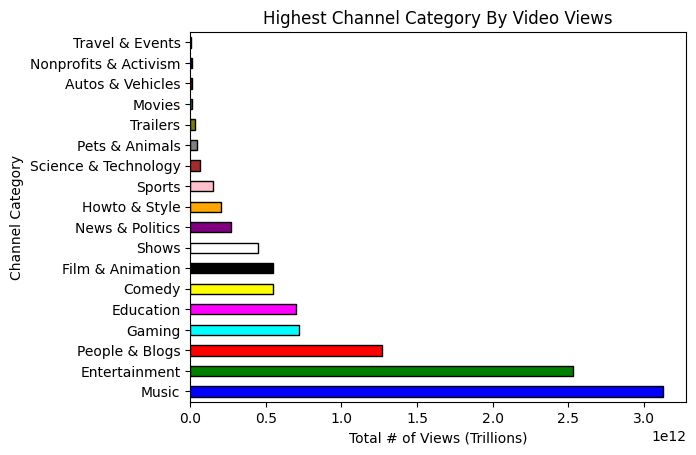

In [66]:
pd.to_numeric(df['video views'], errors='coerce')
df['video views'] = df['video views'].astype('Int64') 

category_views = df.groupby('category')['video views'].sum().sort_values(ascending=False)

category_views.plot(kind='barh', title='Highest Channel Category By Video Views', xlabel='Total # of Views (Trillions)', ylabel='Channel Category', color=[
    'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white',
    'purple', 'orange', 'pink', 'brown', 'gray', 'olive', 'teal',
    'maroon', 'navy', 'lime'
], edgecolor='black')

### Answer 1: We can see from the histogram that Music channels get the most views. Entertainment being more than half a trillion away, and every other category being not even close. This leads us to our next question.


### Question 2: What channel has the highest chance of reaching a good amount of views?
Sure music has the most views, but that doesn't mean if you start a music channel your chances of success are high. We want to find out which channel category passes over the median video views the most amount of times. In order to solve this, we need to find out the median of the video views and plot a bar graph that showcases the categories that pass over the median the most.

In [94]:
df['video views'].describe([.50]) 

count                 995.0
mean     11039537052.038191
std      14110844376.829668
min                     0.0
50%            7760819588.0
max          228000000000.0
Name: video views, dtype: Float64

Our median is **7760819588.0**. Let's see how many channel categories acheive that.

<Axes: title={'center': '# of Times Category Passes Median Video View'}, xlabel='Total # of Times', ylabel='Channel Category'>

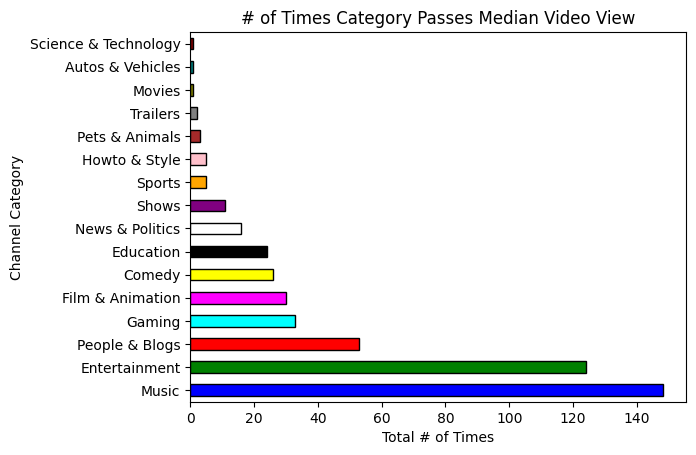

In [91]:
filtered_df = df.loc[(df['video views'] >= 7760819588.0)]

categoryTimesOverMedian_df = filtered_df['category'].value_counts()

categoryTimesOverMedian_df.plot(kind='barh', title='# of Times Category Passes Median Video View', xlabel='Total # of Times', ylabel='Channel Category', color=[
    'blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white',
    'purple', 'orange', 'pink', 'brown', 'gray', 'olive', 'teal',
    'maroon', 'navy', 'lime'
], edgecolor='black')

### Answer 2: It looks like the graph does not change to much from the previous one. Of couse these are the top youtubers. If you took every YouTube channel you would most likely get a drastically different graph. But it looks like the Music category occurs the most when it comes to the most popular channels.

### Question 3: How many popular legacy channels created before 2012 are still around compared to channels created after?
Let's find out if the channels that laid the foundations are still at the top, or have they been dethroned by more recent channels. We will create a pie chart that shows the percantage of channels created before the year 2012, compared to after.

<Axes: title={'center': 'Proportion of New vs. Old Channels'}>

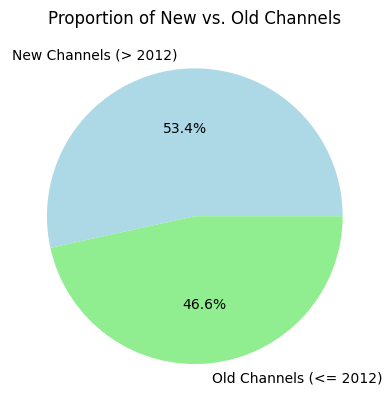

In [123]:
newChannels_count = len(df.loc[(df['created_year'] > 2012)])
oldChannels_count = len(df.loc[(df['created_year'] <= 2012)])

data_to_plot = pd.Series([newChannels_count, oldChannels_count], index=['New Channels (> 2012)', 'Old Channels (<= 2012)'])

data_to_plot.plot(kind='pie', title='Proportion of New vs. Old Channels', ylabel='', autopct='%1.1f%%', colors=['lightblue','lightgreen'])

### Answer 3: From our pie chart, we can see that the top channel space is taken mostly by newer channels, but not by much. It is nearly a 50/50 divide.

### Question 4: Does upload frequency effect subscriber count?
Mr.Beast once said, "Make 100 videos, and see how they do. Listen, learn and make each one better". Now of course, most of these channels have uploaded more than 100 videos. But let's find out if a more frequent upload count can lead to more people subscribing to your channel. We will create a scatter plot that shows the channels upload count compared to their total subscribers.

<Axes: title={'center': 'Total Subscribers Based On Uploads Total'}, xlabel='# of Uploads', ylabel='Subscribers (Millions)'>

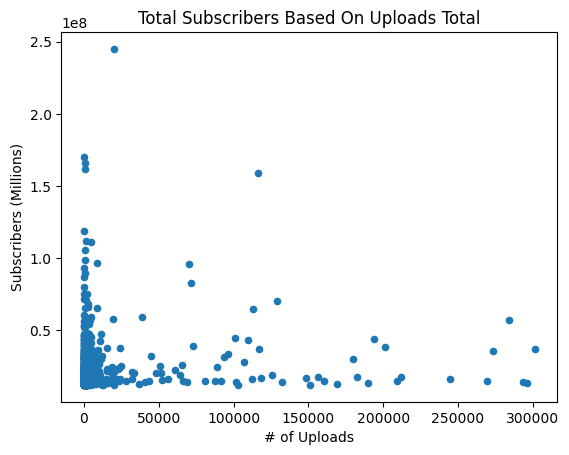

In [142]:
df.plot(
    kind='scatter', 
    x='uploads', 
    y='subscribers',
    title='Total Subscribers Based On Uploads Total',
    xlabel='# of Uploads',
    ylabel='Subscribers (Millions)'
)

### Answer 4: As shown in the scatter plot, the graph is right-skewed. We can see that number of uploads does not effect subscriber count. That means they are independent variables. The highest subscriber count channels are located with the majority of the datapoints so we have our answer.

### Question 5: Which channels get the most video views per subscriber?
A high number here means the channels content is reaching a wide audience beyond just it's core subscriber base. We can find out if there is growth potential or viral content. We will display the 10 most efficient channels, and as a bonus, the 10 least efficient channels.

In [151]:
df['views_per_subscriber'] = df['video views'] / (df['subscribers'] + 1)

most_efficient_channels = df.sort_values(by='views_per_subscriber', ascending=False)
least_efficient_channels = df.sort_values(by='views_per_subscriber', ascending=True)

print("--- Top 10 Most Efficient Channels (Most Views per Subscriber) ---")
print(most_efficient_channels[['Youtuber', 'views_per_subscriber', 'video views', 'subscribers']].head(10))

print("\n--- Top 10 Least Efficient Channels (Fewest Views per Subscriber) ---")
print(least_efficient_channels[['Youtuber', 'views_per_subscriber', 'video views', 'subscribers']].head(10))

--- Top 10 Most Efficient Channels (Most Views per Subscriber) ---
             Youtuber  views_per_subscriber  video views  subscribers
259      netd mï¿½ï¿½           2328.053327  56106087508     24100000
882       jbalvinVEVO           1571.483714  20743586601     13200000
111      Ryan's World           1571.018143  55299840198     35200000
378  Vijay Television           1441.480646  29406206620     20400000
748       Maroon5VEVO           1382.246215  20042571499     14500000
464       shakiraVEVO           1378.648093  25367126292     18400000
294      Tsuriki Show           1369.326596  31494513067     23000000
798          ViralHog           1351.263271  18917687143     14000000
231          LankyBox           1350.412627  34300482066     25400000
789        MalumaVEVO           1348.506499  19013942981     14100000

--- Top 10 Least Efficient Channels (Fewest Views per Subscriber) ---
               Youtuber  views_per_subscriber  video views  subscribers
1        YouTube Mov

### Answer 5: We can see that 'netd' is doing well in terms of reaching a wider audience. They are doing nearly 1000 more views_per_subscriber than the following channels. Compared to channels like 'Happy Lives' that are doing poorly with wide audience growth with a total of **0.000114**.